<a href="https://colab.research.google.com/github/vanhoanglong213/Tensorflow_187/blob/master/catdog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

#directly specify keras symbols, call name directly (ex: Dense instead of tf.keras.layers.Dense)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Get data

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin = _URL, extract = True)

68608000/68606236 [==============================] - 1s 0us/step


In [0]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')  #directory with our training cat pic
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [5]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images: ', num_cats_tr)
print('total training dog images: ', num_dogs_tr)

print('total validation cat images: ', num_cats_val)
print('total validation dog images: ', num_dogs_val)

print('------')

print('total training images: ', total_train)
print('total validation images: ', total_val)

total training cat images:  1000
total training dog images:  1000
total validation cat images:  500
total validation dog images:  500
------
total training images:  2000
total validation images:  1000


In [0]:
BATCH_SIZE = 100
IMG_SHAPE = 150  #size input is 150x150

DATA AUGMENTATION

In [0]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1,5, figsize = (20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

In [0]:
image_gen = ImageDataGenerator (rescale = 1./255, horizontal_flip = True)
train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE, 
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (IMG_SHAPE, IMG_SHAPE))

In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

rotating image

In [0]:
image_gen = ImageDataGenerator(rescale = 1./255, rotation_range = 45)
train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE, 
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (IMG_SHAPE, IMG_SHAPE))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [0]:
image_gen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.5)
train_data_gen = image_gen.flow_from_directory(batch_size = BATCH_SIZE, 
                                               directory = train_dir,
                                               shuffle = True,
                                               target_size = (IMG_SHAPE, IMG_SHAPE))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [8]:
image_gen_train = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 45,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
train_data_gen = image_gen_train.flow_from_directory(batch_size = BATCH_SIZE,
                                                    directory = train_dir,
                                                    shuffle = True,
                                                    target_size = (IMG_SHAPE, IMG_SHAPE),
                                                    class_mode = 'binary'
                                                    )

Found 2000 images belonging to 2 classes.


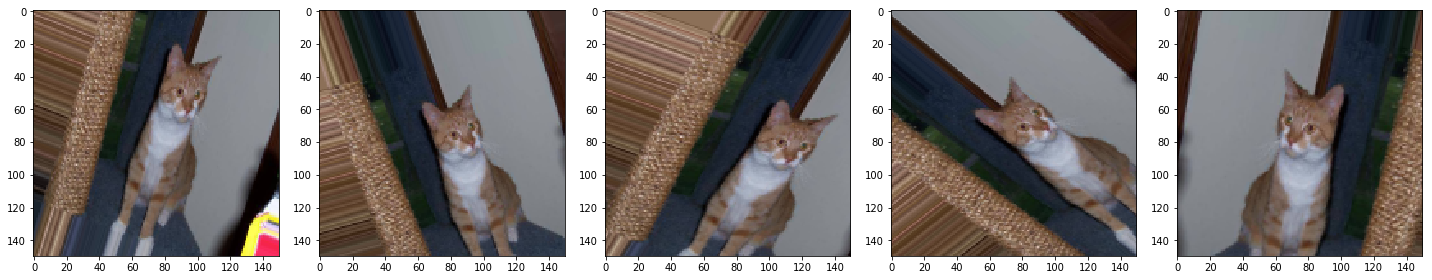

In [9]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

create validation data generator

In [10]:
image_gen_val = ImageDataGenerator(rescale = 1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size = BATCH_SIZE,
                                                 directory = validation_dir,
                                                 target_size = (IMG_SHAPE, IMG_SHAPE),
                                                 class_mode = 'binary'
                                               )

Found 1000 images belonging to 2 classes.


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'softmax')
])

W0721 05:30:33.451007 139633627568000 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(optimizer = 'adam', 
             loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [14]:
epochs = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = int(np.ceil(total_train/ float(BATCH_SIZE))),
    epochs = epochs,
    validation_data = val_data_gen,
    validation_steps = int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/100
20/20 [==============================] - 23s 1s/step - loss: 0.7334 - acc: 0.5025 - val_loss: 0.6926 - val_acc: 0.5000
Epoch 2/100
20/20 [==============================] - 21s 1s/step - loss: 0.6930 - acc: 0.5045 - val_loss: 0.6926 - val_acc: 0.6000
Epoch 3/100
20/20 [==============================] - 21s 1s/step - loss: 0.6928 - acc: 0.5070 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/100
20/20 [==============================] - 20s 993ms/step - loss: 0.6909 - acc: 0.5285 - val_loss: 0.6851 - val_acc: 0.5680
Epoch 5/100
20/20 [==============================] - 19s 955ms/step - loss: 0.6852 - acc: 0.5440 - val_loss: 0.7222 - val_acc: 0.5030
Epoch 6/100
20/20 [==============================] - 20s 1s/step - loss: 0.6820 - acc: 0.5705 - val_loss: 0.6627 - val_acc: 0.5700
Epoch 7/100
20/20 [==============================] - 21s 1s/step - loss: 0.6615 - acc: 0.5920 - val_loss: 0.6654 - val_acc: 0.5720
Epoch 8/100
20/20 [==============================] - 20s 997ms/step - loss: 0

/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "lower_right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))
/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "uper_right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


Text(0.5, 1.0, 'Training and validation loss')

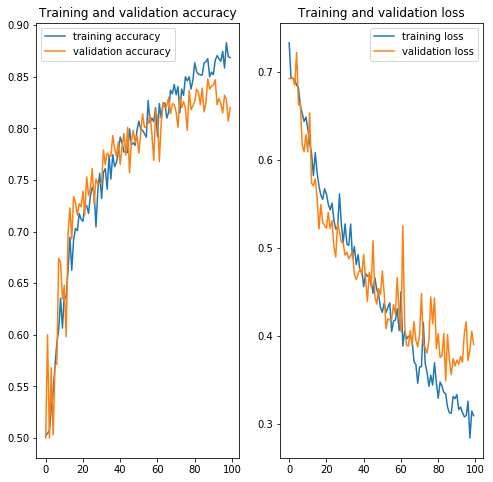

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'training accuracy')
plt.plot(epochs_range, val_acc, label = 'validation accuracy')
plt.legend(loc = 'lower_right')
plt.title('Training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'training loss')
plt.plot(epochs_range, val_loss, label = 'validation loss')
plt.legend(loc = 'uper_right')
plt.title('Training and validation loss')

